In [24]:
import pylhe
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [47]:
def create_df(events): 
    
    dict = {
        'px(e) (GeV)': [],
        'py(e) (GeV)': [],
        'pz(e) (GeV)': [],
        'e(e) (GeV)': [],
        'px(wab) (GeV)': [],
        'py(wab) (GeV)': [],
        'pz(wab) (GeV)': [],
        'e(wab) (GeV)': []
    }
    
    for event in events: 
        dict['px(e) (GeV)'].append(event.particles[2].px)
        dict['py(e) (GeV)'].append(event.particles[2].py)
        dict['pz(e) (GeV)'].append(event.particles[2].pz)
        dict['e(e) (GeV)'].append(event.particles[2].e)
        dict['px(wab) (GeV)'].append(event.particles[4].px)
        dict['py(wab) (GeV)'].append(event.particles[4].py)
        dict['pz(wab) (GeV)'].append(event.particles[4].pz)
        dict['e(wab) (GeV)'].append(event.particles[4].e)

    df = pd.DataFrame(dict)
    df['pt(e) (GeV)'] = (df['px(e) (GeV)']**2 + df['py(e) (GeV)']**2)**(1/2)
    df['theta(e) (rad)'] = np.arctan2(df['pt(e) (GeV)'], df['pz(e) (GeV)'])
    df['pt(wab) (GeV)'] = (df['px(wab) (GeV)']**2 + df['py(wab) (GeV)']**2)**(1/2)
    df['theta(wab) (rad)'] = np.arctan2(df['pt(wab) (GeV)'], df['pz(wab) (GeV)'])

    return df


def draw_histogram1D(ax, var, xmin, xmax, bins, **kargs): 
    
    bins = np.linspace(xmin, xmax, bins)
    values, xedges = np.histogram(var, bins=bins)
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
        
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral
    
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    color = 'forestgreen'
    if 'color' in kargs:
        color = kargs['color']

    edgecolor = 'darkgreen'
    if 'edgecolor' in kargs: 
        edgecolor = kargs['edgecolor']
    
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
    
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.3, 
            linewidth=2, color=color, edgecolor=edgecolor, label=label )
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

    ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')

    return values, bin_centers

In [48]:
events = pylhe.read_lhe_with_attributes('./events.lhe')
pylhe.read_num_events('./events.lhe')
df = create_df(events)
df

,px(e) (GeV),py(e) (GeV),pz(e) (GeV),e(e) (GeV),px(wab) (GeV),py(wab) (GeV),pz(wab) (GeV),e(wab) (GeV),pt(e) (GeV),theta(e) (rad),pt(wab) (GeV),theta(wab) (rad)
0,-0.003791,-0.011568,0.994272,0.994346,-0.000268,-0.000684,0.061652,0.061656,0.012173,0.012243,0.000734,0.011911
1,0.002357,0.008164,0.725404,0.725453,0.001351,0.003550,0.330524,0.330546,0.008498,0.011714,0.003798,0.011492
2,0.003089,0.009472,0.250089,0.250288,-0.005093,-0.009386,0.805641,0.805712,0.009963,0.039818,0.010678,0.013253
3,0.004284,-0.007279,0.849937,0.849980,-0.001108,-0.002526,0.206002,0.206020,0.008446,0.009937,0.002759,0.013390
4,0.001666,0.004506,0.712465,0.712481,-0.002198,-0.004924,0.343477,0.343519,0.004804,0.006743,0.005392,0.015697
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.000929,0.001243,0.088919,0.088934,-0.009885,0.015555,0.966889,0.967065,0.001552,0.017447,0.018431,0.019059
9996,-0.000153,0.001156,0.975012,0.975013,0.000104,-0.001306,0.080976,0.080987,0.001167,0.001196,0.001311,0.016184
9997,-0.000847,0.004795,0.825184,0.825198,0.002105,-0.004774,0.230743,0.230802,0.004869,0.005900,0.005217,0.022607
9998,-0.008844,-0.010192,0.769923,0.770042,-0.003403,-0.003354,0.285918,0.285958,0.013495,0.017526,0.004778,0.016710


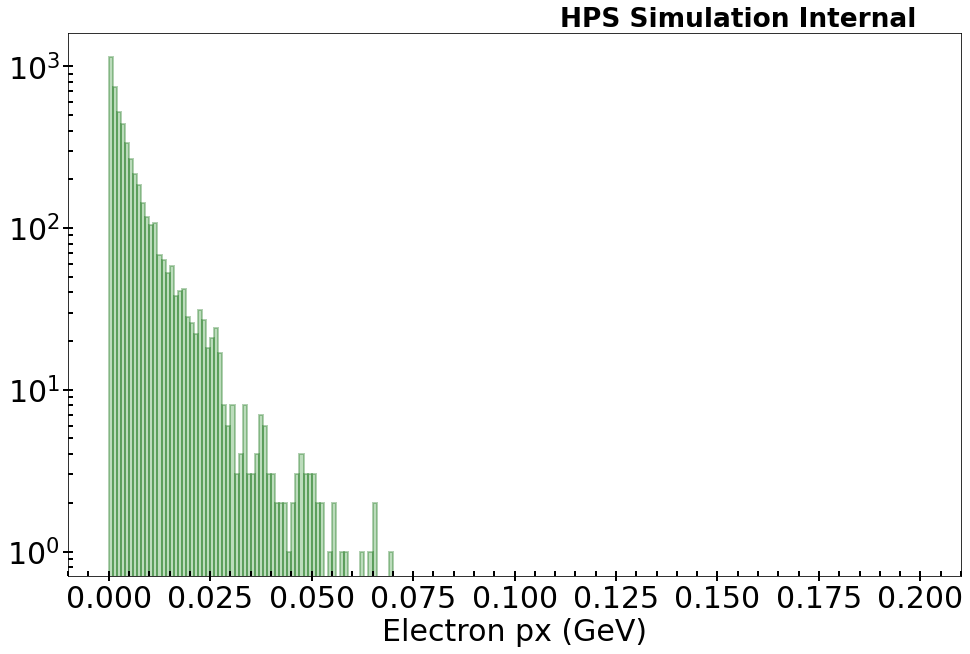

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['px(e) (GeV)'], 0, 0.2, 201,
                 x_label='Electron px (GeV)')

ax.set_yscale('log')

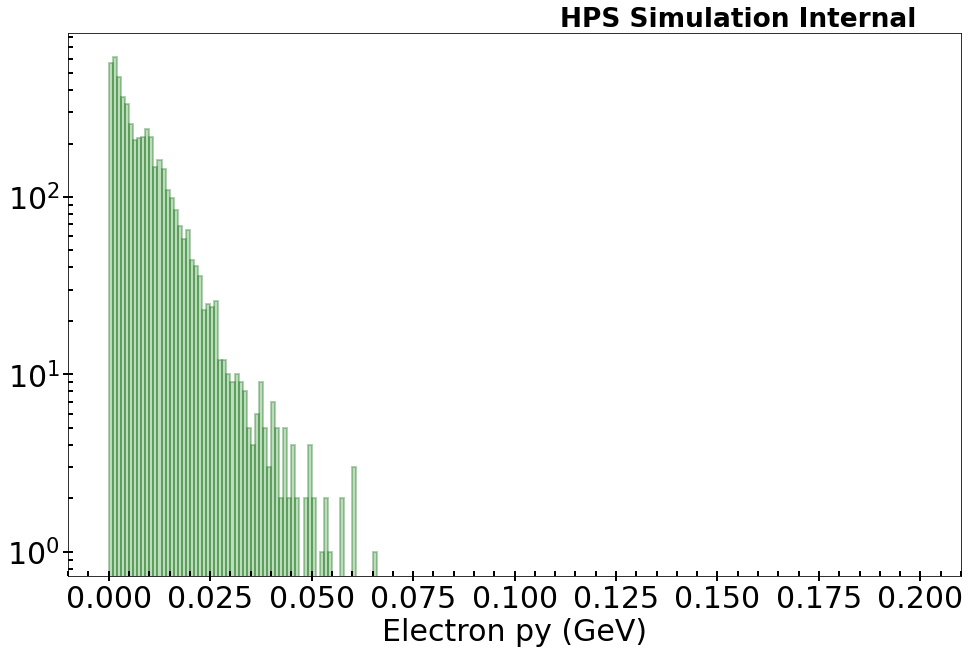

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['py(e) (GeV)'], 0, 0.2, 201,
                 x_label='Electron py (GeV)')

ax.set_yscale('log')

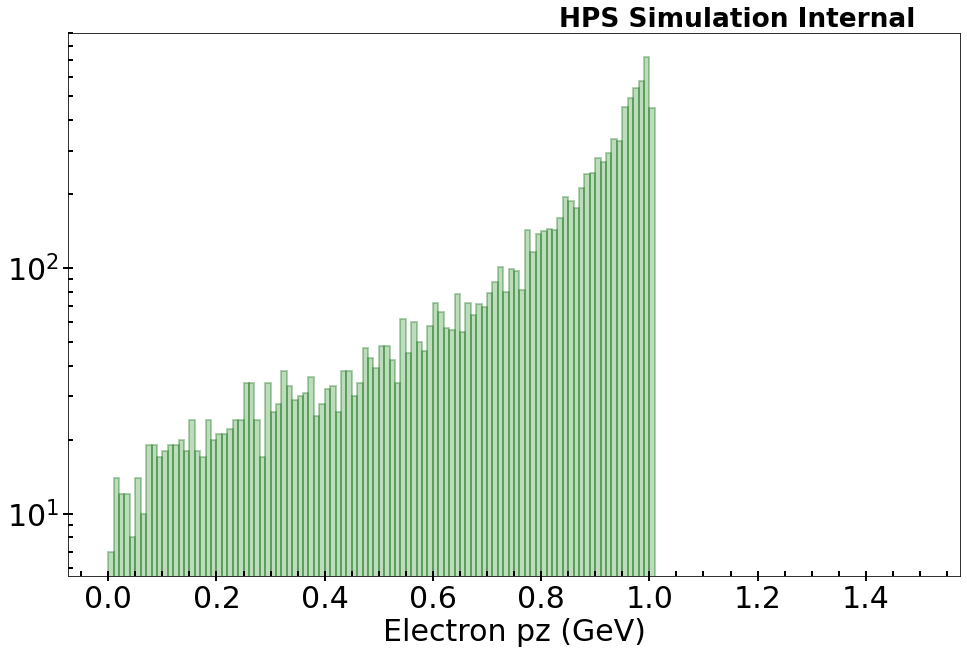

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['pz(e) (GeV)'], 0, 1.5, 151,
                 x_label='Electron pz (GeV)')

ax.set_yscale('log')

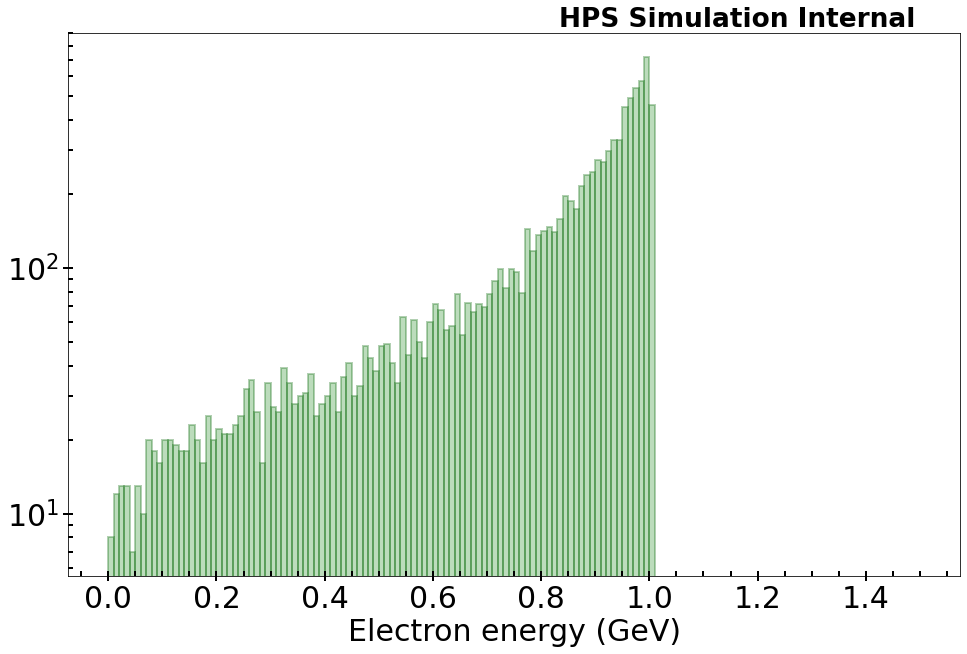

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['e(e) (GeV)'], 0, 1.5, 151,
                 x_label='Electron energy (GeV)')

ax.set_yscale('log')

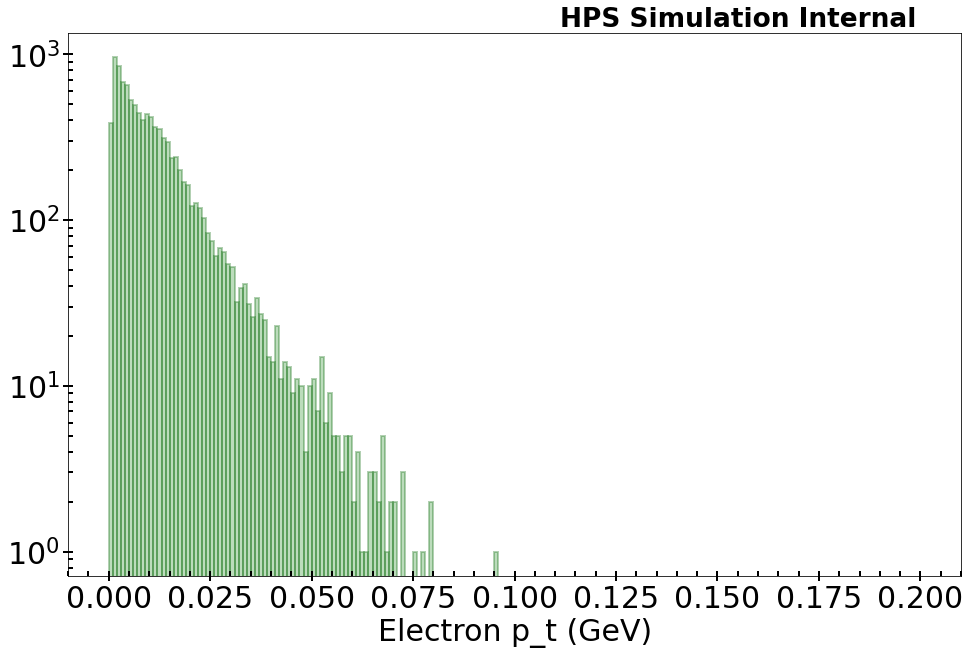

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['pt(e) (GeV)'], 0, 0.2, 201,
                 x_label='Electron p_t (GeV)')

ax.set_yscale('log')

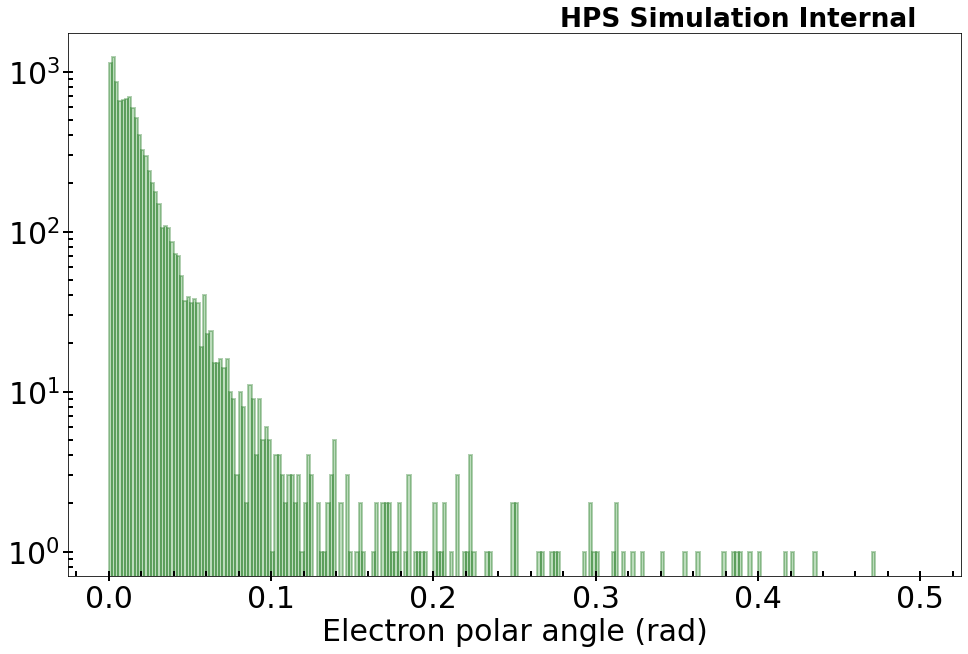

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['theta(e) (rad)'], 0, 0.5, 251,
                 x_label='Electron polar angle (rad)')

ax.set_yscale('log')

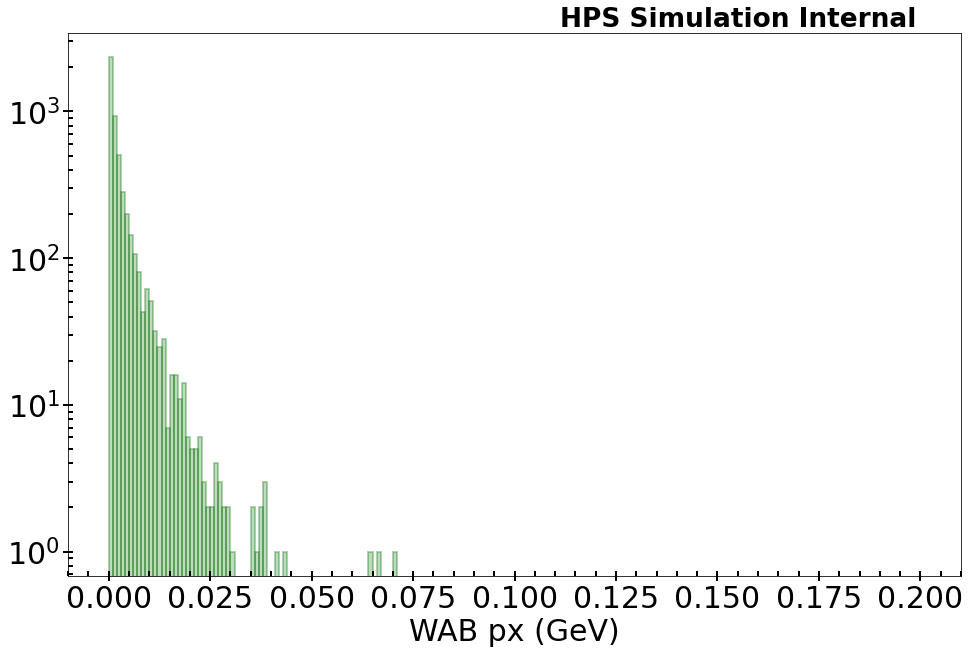

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['px(wab) (GeV)'], 0, 0.2, 201,
                 x_label='WAB px (GeV)')

ax.set_yscale('log')

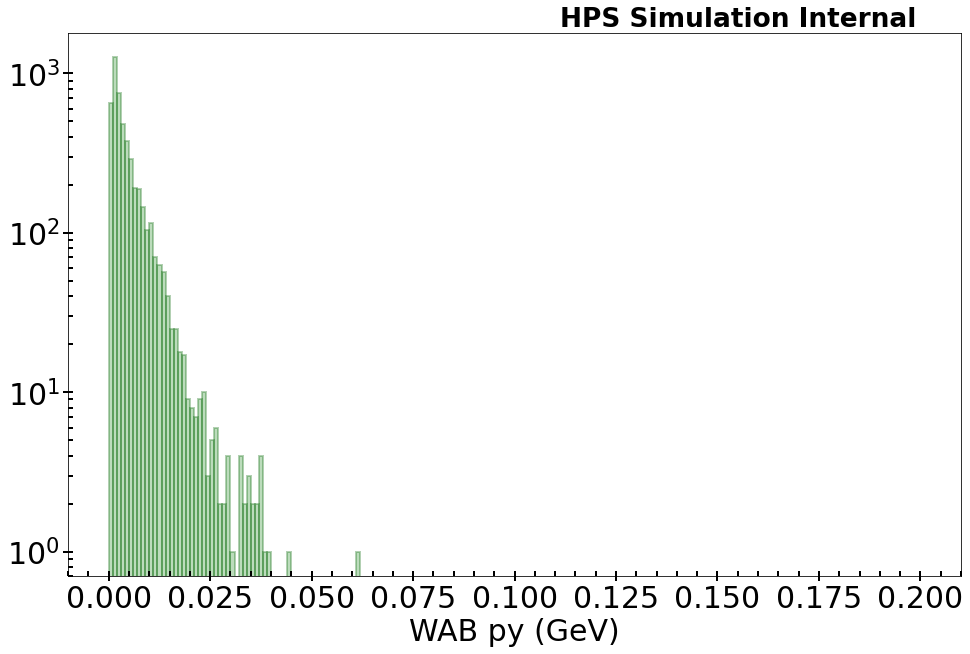

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['py(wab) (GeV)'], 0, 0.2, 201,
                 x_label='WAB py (GeV)')

ax.set_yscale('log')

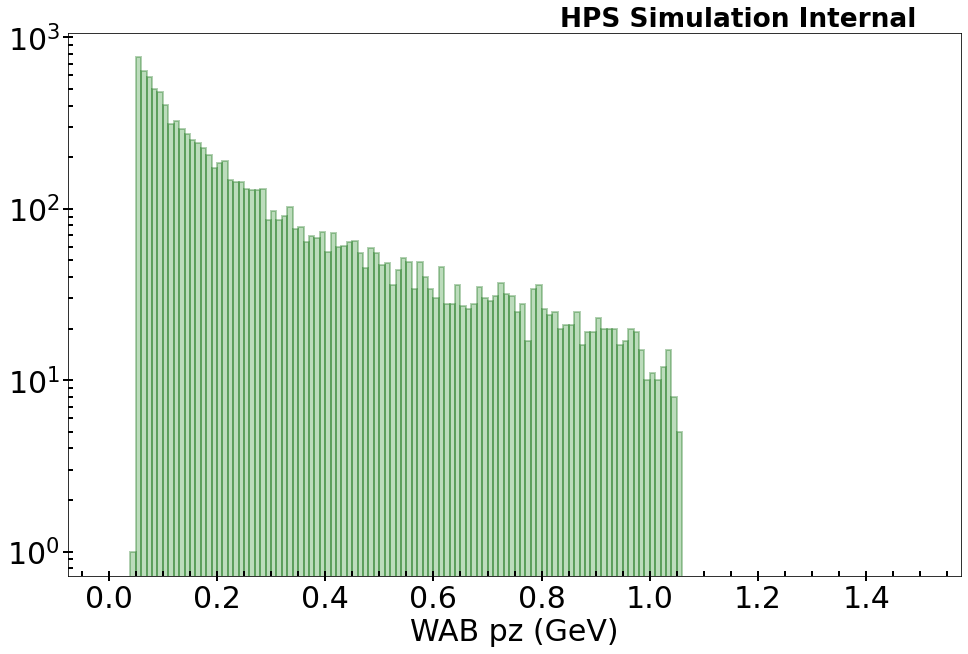

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['pz(wab) (GeV)'], 0, 1.5, 151,
                 x_label='WAB pz (GeV)')

ax.set_yscale('log')

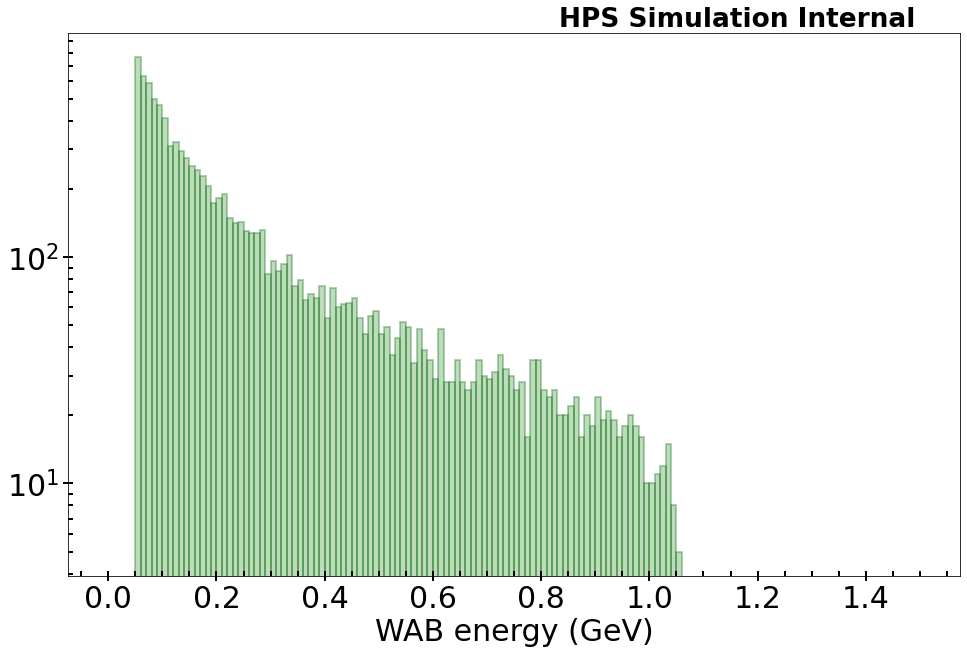

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['e(wab) (GeV)'], 0, 1.5, 151,
                 x_label='WAB energy (GeV)')

ax.set_yscale('log')

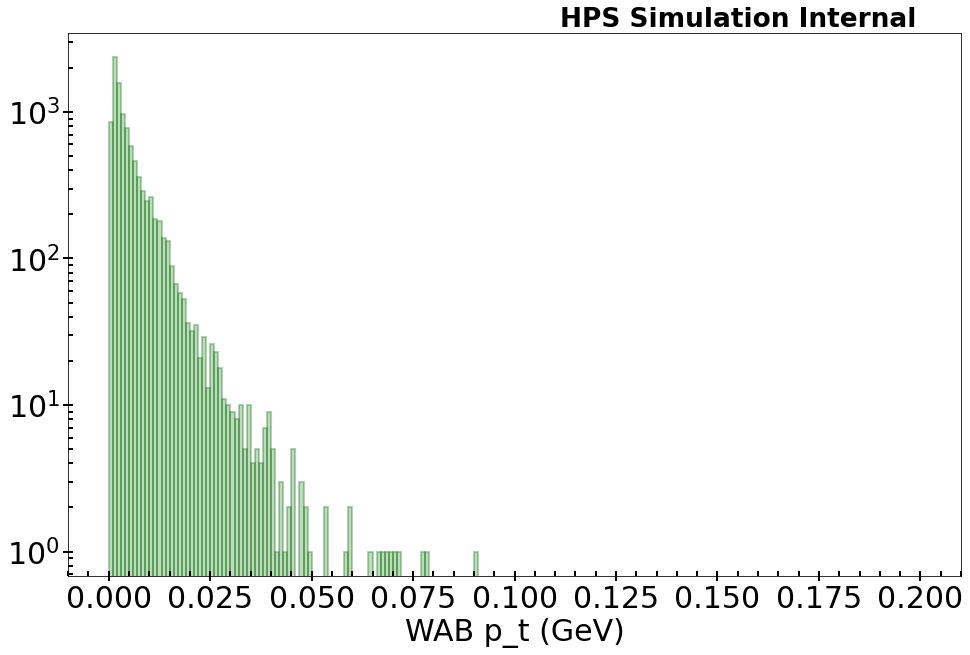

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['pt(wab) (GeV)'], 0, 0.2, 201,
                 x_label='WAB p_t (GeV)')

ax.set_yscale('log')

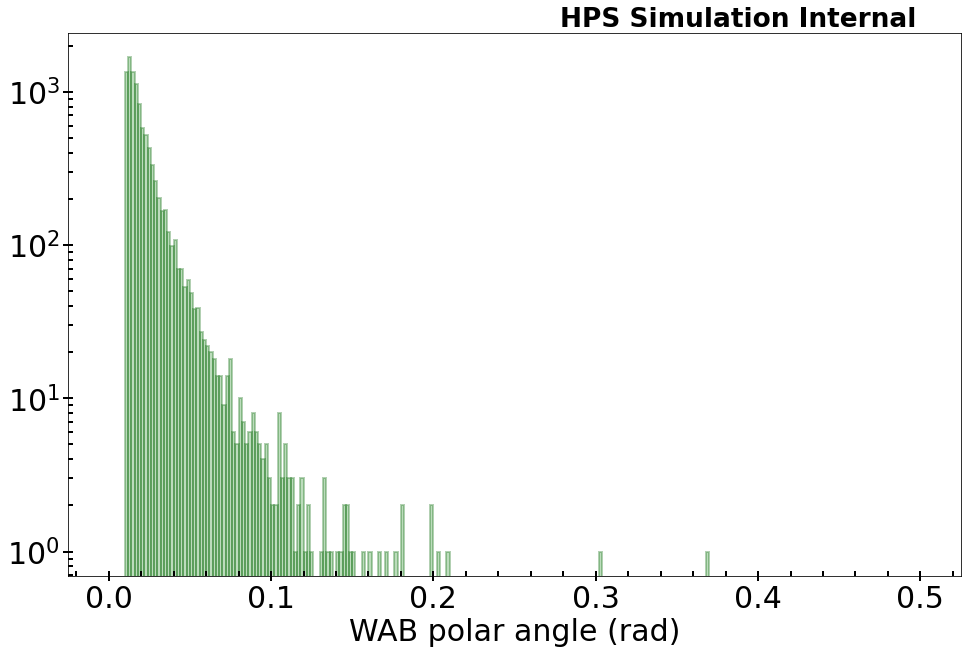

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

draw_histogram1D(ax, df['theta(wab) (rad)'], 0, 0.5, 251,
                 x_label='WAB polar angle (rad)')

ax.set_yscale('log')